In [ ]:
!pip install pandas numpy matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install openpyxl

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_excel("Consumer_Complaints.xlsx")

df.head()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [32]:
df.head(10)

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes
5,6237961,Web,2022-11-23,2022-11-23,CA,Credit card or prepaid card,General-purpose credit card or charge card,Getting a credit card,Card opened as result of identity theft or fraud,Company has responded to the consumer and the ...,Closed with explanation,Yes
6,4348292,Web,2021-05-04,2021-05-04,TX,Checking or savings account,Checking account,Closing an account,Funds not received from closed account,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
7,4090544,Web,2021-01-24,2021-01-24,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
8,5337082,Web,2022-03-18,2022-03-18,TX,Credit card or prepaid card,General-purpose credit card or charge card,Fees or interest,Problem with fees,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
9,6203657,Web,2022-11-14,2022-11-14,VA,Checking or savings account,Other banking product or service,Closing an account,Funds not received from closed account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [17]:
df.shape

(62516, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62509 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Sub-issue                     51658 non-null  object        
 9   Company public response       60341 non-null  object        
 10  Company response to consumer  62516 non-null  object        
 11  Timely response?            

In [116]:
df.isnull().sum().sort_values(ascending=False)

Complaint ID                    0
Submitted_Via                   0
Date submitted                  0
Date received                   0
State                           0
Product                         0
Sub_Product                     0
Issue                           0
Sub_Issue                       0
Company_Public_Response         0
Company_Response_To_Consumer    0
Timely_Response                 0
dtype: int64

In [169]:
df.rename(columns={'Date submitted':'Date_Submitted',
    'Sub-product': 'Sub_Product',
    'Sub-issue': 'Sub_Issue',
    'Company public response': 'Company_Public_Response',
    'Company response to consumer': 'Company_Response_To_Consumer',
    'Timely response?': 'Timely_Response',
    'Submitted via': 'Submitted_Via'
}, inplace=True)


In [171]:
# handling the missing values in the mentioned features
df['Sub_Issue'] = df['Sub_Issue'].fillna('Missing')
df['Company_Public_Response'] = df['Company_Public_Response'].fillna('Missing')
df['Timely_Response'] = df['Timely_Response'].fillna('Missing')
df['Sub_Product']= df['Sub_Product'].fillna('Missing')
df.head()





,Complaint ID,Submitted_Via,Date_Submitted,Date received,State,Product,Sub_Product,Issue,Sub_Issue,Company_Public_Response,Company_Response_To_Consumer,Timely_Response,Month
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Missing,Company has responded to the consumer and the ...,Closed with explanation,Yes,10
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,Missing,Company has responded to the consumer and the ...,Closed with monetary relief,Yes,4
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes,7
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",Missing,In progress,Missing,7
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes,7


In [119]:
df.isnull().sum().sort_values(ascending=False)

Complaint ID                    0
Submitted_Via                   0
Date submitted                  0
Date received                   0
State                           0
Product                         0
Sub_Product                     0
Issue                           0
Sub_Issue                       0
Company_Public_Response         0
Company_Response_To_Consumer    0
Timely_Response                 0
dtype: int64

In [120]:
x = df.groupby(['State'])['Complaint ID'].count()
df1 = pd.DataFrame(x)
df1.head()

,Complaint ID
State,
AK,110
AL,269
AR,266
AZ,1516
CA,13709


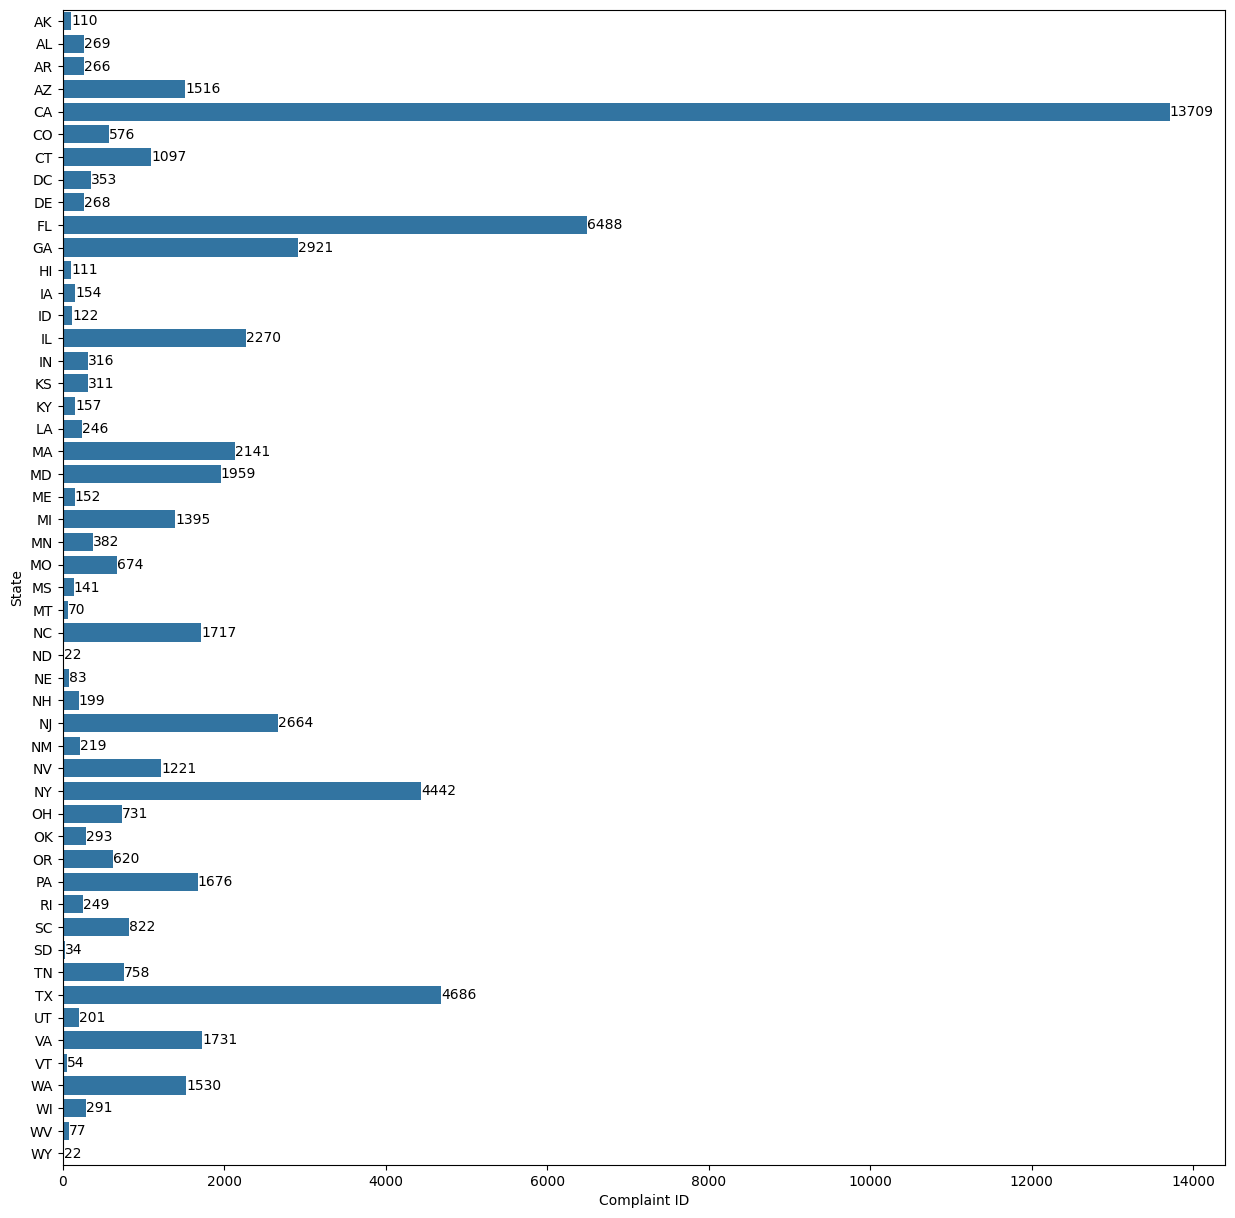

In [121]:
plt.figure(figsize=(15,15))

bplot = sns.barplot(y = df1.index, x = df1['Complaint ID']);

plt.bar_label(bplot.containers[0]);

<Axes: xlabel='Month'>

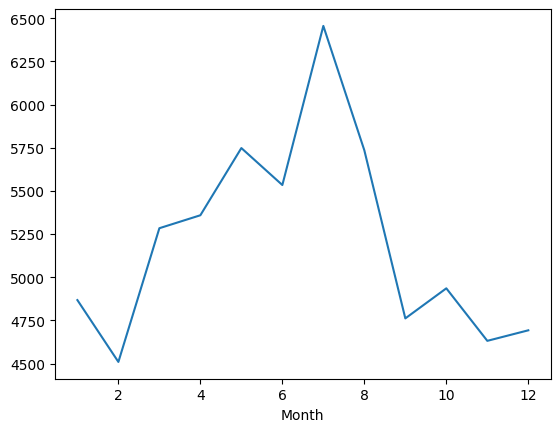

In [ ]:
# consumer complaint showing seasonal trends
df['Month'] = pd.to_datetime(df['Date received']).dt.month
monthly_counts = df.groupby('Month')['Complaint ID'].count()
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values)

In [ ]:
# Complaints by product
df.groupby(['Product'])['Complaint ID'].count()

Product
Checking or savings account                                                     24814
Credit card or prepaid card                                                     16197
Credit reporting, credit repair services, or other personal consumer reports     7710
Debt collection                                                                  2736
Money transfer, virtual currency, or money service                               3453
Mortgage                                                                         6601
Payday loan, title loan, or personal loan                                         333
Student loan                                                                       39
Vehicle loan or lease                                                             633
Name: Complaint ID, dtype: int64

In [123]:
x = df.groupby(['Product'])['Complaint ID'].count()
df2 = pd.DataFrame(x)
df2 = df2.sort_values(by = 'Complaint ID', ascending = False)
df2

,Complaint ID
Product,
Checking or savings account,24814
Credit card or prepaid card,16197
"Credit reporting, credit repair services, or other personal consumer reports",7710
Mortgage,6601
"Money transfer, virtual currency, or money service",3453
Debt collection,2736
Vehicle loan or lease,633
"Payday loan, title loan, or personal loan",333
Student loan,39


In [ ]:
# Complaints resolution category
df['Company_Response_To_Consumer'].value_counts()

Company_Response_To_Consumer
Closed with explanation            41044
Closed with monetary relief        14697
Closed with non-monetary relief     5273
In progress                         1494
Closed                                 8
Name: count, dtype: int64

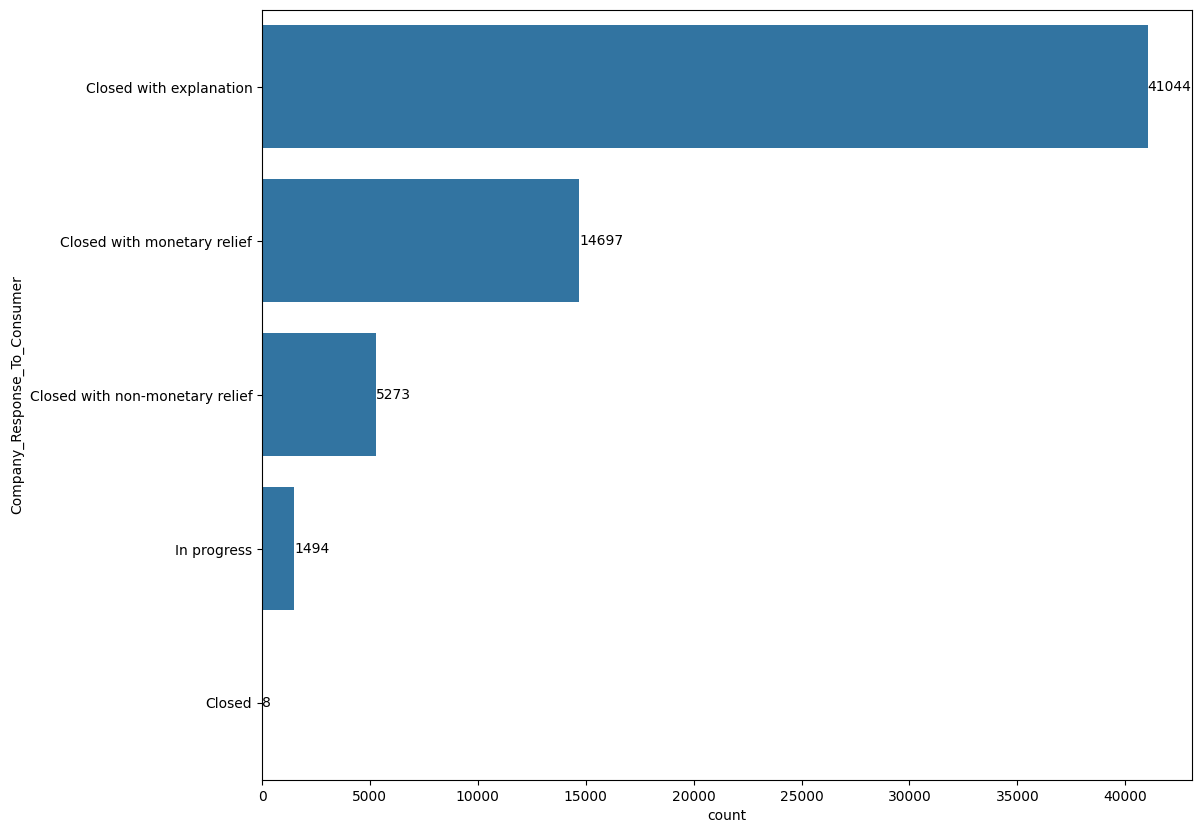

In [125]:
plt.figure(figsize=(12,10))

cplot = sns.countplot(y=df['Company_Response_To_Consumer'], order = df['Company_Response_To_Consumer'].value_counts().index);

plt.bar_label(cplot.containers[0]);

In [ ]:
#  Three KPIs created below

In [14]:
# 1.

In [126]:
df['Complaint ID'].count()

np.int64(62516)

In [90]:
# 2.

In [127]:
df[df['Company_Response_To_Consumer'] == 'In progress']

,Complaint ID,Submitted_Via,Date submitted,Date received,State,Product,Sub_Product,Issue,Sub_Issue,Company_Public_Response,Company_Response_To_Consumer,Timely_Response
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",Missing,In progress,Missing
69,7388226,Web,2023-08-11,2023-08-11,AZ,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,Missing,In progress,Missing
94,7387569,Web,2023-08-11,2023-08-11,TX,Debt collection,I do not know,Written notification about debt,Didn't receive enough information to verify debt,Missing,In progress,Missing
105,7387966,Web,2023-08-11,2023-08-11,NJ,Checking or savings account,Checking account,Closing an account,Can't close your account,Missing,In progress,Missing
145,7312071,Web,2023-07-28,2023-07-28,MD,Checking or savings account,Checking account,Closing an account,Funds not received from closed account,Missing,In progress,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
58664,7200180,Web,2023-07-03,2023-07-03,NY,Vehicle loan or lease,Loan,Problem with a credit reporting company's inve...,Investigation took more than 30 days,Missing,In progress,Missing
58705,7175401,Web,2023-06-27,2023-06-27,CA,"Money transfer, virtual currency, or money ser...",Domestic (US) money transfer,Other transaction problem,Missing,Missing,In progress,Missing
58780,7210770,Web,2023-07-05,2023-07-05,CA,Credit card or prepaid card,Government benefit card,Unexpected or other fees,Missing,Missing,In progress,Missing
58795,7258226,Web,2023-07-17,2023-07-17,CA,"Credit reporting, credit repair services, or o...",Other personal consumer report,Identity theft protection or other monitoring ...,Didn't receive services that were advertised,Missing,In progress,Missing


In [ ]:
# dataframe showing the missing data
df_new = df.copy()
df_new.head()

,Complaint ID,Submitted_Via,Date submitted,Date received,State,Product,Sub_Product,Issue,Sub_Issue,Company_Public_Response,Company_Response_To_Consumer,Timely_Response
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Missing,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,Missing,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",Missing,In progress,Missing
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [ ]:
# Imputing the NaN values with "In Progress"
df_new['Timely_Response'].fillna('In Progress', inplace = True)

df_new

C:\Users\dhara\AppData\Local\Temp\ipykernel_31700\56551907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Timely_Response'].fillna('In Progress', inplace = True)


,Complaint ID,Submitted_Via,Date submitted,Date received,State,Product,Sub_Product,Issue,Sub_Issue,Company_Public_Response,Company_Response_To_Consumer,Timely_Response
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Missing,Company has responded to the consumer and the ...,Closed with explanation,Yes
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,Missing,Company has responded to the consumer and the ...,Closed with monetary relief,Yes
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",Missing,In progress,Missing
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
62511,2501211,Web,2017-06-04,2017-06-04,TX,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,Company has responded to the consumer and the ...,Closed with explanation,Yes
62512,2472406,Referral,2017-05-01,2017-05-05,VA,Checking or savings account,Other banking product or service,Problem caused by your funds being low,Non-sufficient funds and associated fees,Company has responded to the consumer and the ...,Closed with explanation,Yes
62513,3704015,Web,2020-06-17,2020-06-17,TN,"Credit reporting, credit repair services, or o...",Credit repair services,Confusing or missing disclosures,Missing,Company has responded to the consumer and the ...,Closed with explanation,Yes
62514,2488973,Referral,2017-05-19,2017-05-19,GA,Mortgage,Other type of mortgage,Trouble during payment process,Missing,Company has responded to the consumer and the ...,Closed with explanation,Yes


In [130]:
df_new['Timely_Response'].value_counts()

Timely_Response
Yes        58619
No          2403
Missing     1494
Name: count, dtype: int64

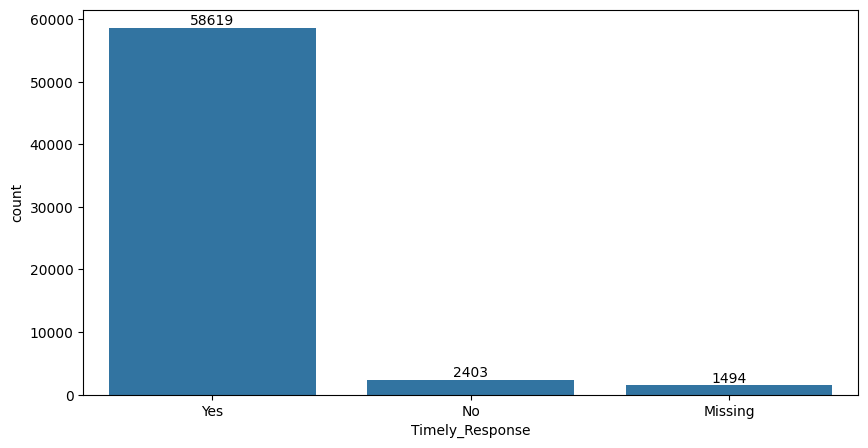

In [131]:
plt.figure(figsize=(10,5))

cplot = sns.countplot(x=df_new['Timely_Response'], order = df_new['Timely_Response'].value_counts().index);

plt.bar_label(cplot.containers[0]);

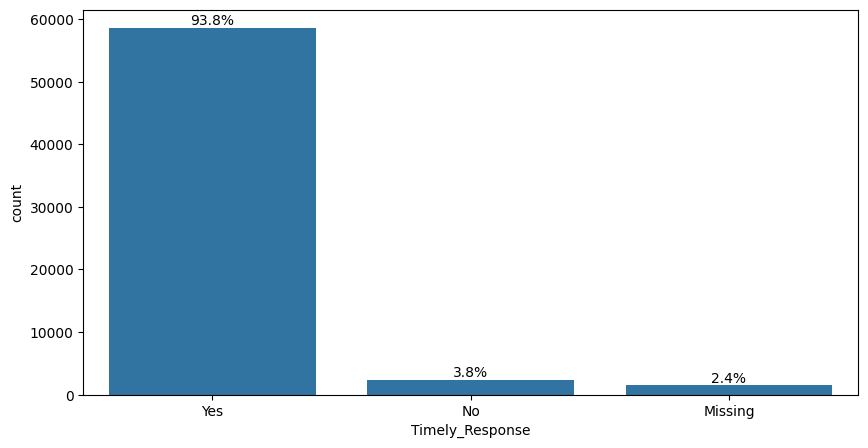

In [132]:
fig = plt.figure(figsize = (10,5))

ax = sns.countplot(x='Timely_Response', data=df_new, order = df_new["Timely_Response"].value_counts().index)
# get the total count of the type column
total = df_new["Timely_Response"].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')

plt.show()

In [23]:
# 3

In [133]:
df['Company_Response_To_Consumer'].value_counts()

Company_Response_To_Consumer
Closed with explanation            41044
Closed with monetary relief        14697
Closed with non-monetary relief     5273
In progress                         1494
Closed                                 8
Name: count, dtype: int64

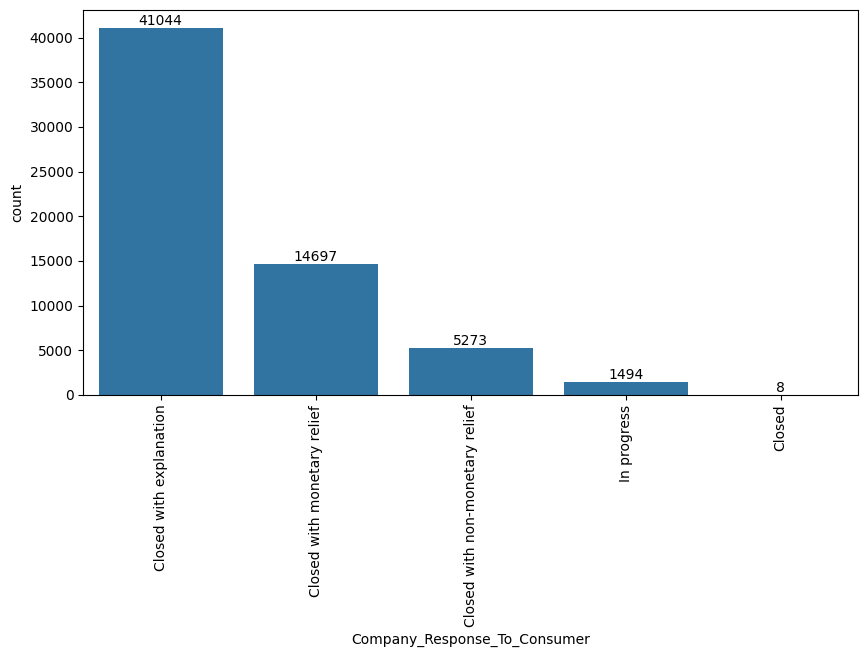

In [134]:
plt.figure(figsize=(10,5))

cplot = sns.countplot(x=df_new['Company_Response_To_Consumer'], order = df_new['Company_Response_To_Consumer'].value_counts().index);

plt.bar_label(cplot.containers[0]);

plt.xticks(rotation = 90);

In [ ]:
!pip install scikit-learn

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Select Features and Target
features = ['Product', 'Sub_Product', 'Issue', 'State', 'Timely_Response', ]
target = 'Company_Response_To_Consumer'

# 2. Handle Categorical Variables using Label Encoding (or OneHot if needed)
df_encoded = df[features + [target]].copy()
label_encoders = {}



In [155]:
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder if needed later



In [157]:
# 3. Split into X (features) and y (target)
X = df_encoded[features]
y = df_encoded[target]



In [158]:
#4. Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Check dimensions
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (50012, 5)
Test set size: (12504, 5)


In [160]:
X_train

,Product,Sub_Product,Issue,State,Timely_Response
13060,1,14,44,6,2
56540,0,3,47,43,2
62155,0,3,32,9,2
54690,0,3,32,23,2
56679,4,46,19,9,2
...,...,...,...,...,...
46921,0,3,32,20,2
43919,0,3,32,43,2
10390,8,23,33,25,2
29257,0,3,32,38,2


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [161]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [162]:
y_pred = model.predict(X_test)

# Step 5: Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6693058221369161


In [163]:
import pandas as pd
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))

State              0.315681
Timely_Response    0.279480
Issue              0.196127
Product            0.133785
Sub_Product        0.074926
dtype: float64


In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define the model
rfc = RandomForestClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on test set
y_pred = best_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Accuracy: 0.6718650031989764

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.69      0.94      0.79      8209
           2       0.44      0.12      0.19      2939
           3       0.34      0.07      0.12      1055
           4       1.00      1.00      1.00       299

    accuracy                           0.67     12504
   macro avg       0.49      0.42      0.42     12504
weighted avg       0.61      0.67      0.60     12504


Confusion Matrix:
 [[   0    2    0    0    0]
 [   0 7679  414  116    0]
 [   0 2563  348   28    0]
 [   0  945   35   75    0]
 [   0    0    0    0  299]]


c:\Users\dhara\OneDrive\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dhara\OneDrive\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\dhara\OneDrive\Desktop\New folder\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

In [ ]:
#from sklearn.metrics import f1_score, balanced_accuracy_score

# Macro F1 Score
#macro_f1 = f1_score(y_test, y_pred, average='macro')
#print("Macro F1-score:", macro_f1)

# Balanced Accuracy
#balanced_acc = balanced_accuracy_score(y_test, y_pred)
#print("Balanced Accuracy:", balanced_acc)



Macro F1-score: 0.4191532025930599
Balanced Accuracy: 0.4249868769666222
